In [134]:
import pandas as pd
import datetime as dt
import time as tm
import pytz
import seaborn as sns
import matplotlib.pyplot as plt  # Make sure to import pyplot



In [135]:
# Replace with the actual paths to your Excel files
file_a = '/Users/vipin_gupta/Documents/Personal/AgodaCaseStudy/Case_Study_Urgency_Message_Data_a.xlsx'
file_b = '/Users/vipin_gupta/Documents/Personal/AgodaCaseStudy/Case_Study_Urgency_Message_Data_b.xlsx'
file_c = '/Users/vipin_gupta/Documents/Personal/AgodaCaseStudy/Case_Study_Urgency_Message_Data_c.xlsx'
file_d = '/Users/vipin_gupta/Documents/Personal/AgodaCaseStudy/Case_Study_Urgency_Message_Data_d.xlsx'
file_e = '/Users/vipin_gupta/Documents/Personal/AgodaCaseStudy/Case_Study_Urgency_Message_Data_e.xlsx'

# Reading each file into a DataFrame
df_a = pd.read_excel(file_a)
df_b = pd.read_excel(file_b)
df_c = pd.read_excel(file_c)
df_d = pd.read_excel(file_d)
df_e = pd.read_excel(file_e)

# Print headers of all dataframes
print("Header of DataFrame A:", df_a.columns)
print("Header of DataFrame B:", df_b.columns)
print("Header of DataFrame C:", df_c.columns)
print("Header of DataFrame D:", df_d.columns)
print("Header of DataFrame E:", df_e.columns)

Header of DataFrame A: Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')
Header of DataFrame B: Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')
Header of DataFrame C: Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')
Header of DataFrame D: Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')
Header of DataFrame E: Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
   

In [137]:
# Show sample records from each DataFrame
print("Sample records from DataFrame A:")
print(df_a.head())  # Show first 5 records from df_a

print("\nSample records from DataFrame B:")
print(df_b.head())  # Show first 5 records from df_b

print("\nSample records from DataFrame C:")
print(df_c.head())  # Show first 5 records from df_c

print("\nSample records from DataFrame D:")
print(df_d.head())  # Show first 5 records from df_d

print("\nSample records from DataFrame E:")
print(df_e.head())  # Show first 5 records from df_e

Sample records from DataFrame A:
   #  ADR_USD  hotel_id  city_id  star_rating accommodation_type_name  \
0  1    71.06    297388     9395          2.5                   Hotel   
1  2    76.56    298322     9395          3.0                   Hotel   
2  3   153.88   2313076     9395          5.0                   Hotel   
3  4   126.60   2240838     9395          3.5                   Hotel   
4  5   115.08   2240838     9395          3.5                   Hotel   

  chain_hotel booking_date checkin_date checkout_date  
0   non-chain   2016-08-02   2016-10-01    2016-10-02  
1   non-chain   2016-08-02   2016-10-01    2016-10-02  
2       chain   2016-08-02   2016-10-01    2016-10-02  
3   non-chain   2016-08-04   2016-10-02    2016-10-03  
4   non-chain   2016-08-04   2016-10-02    2016-10-03  

Sample records from DataFrame B:
   #     ADR_USD  hotel_id  city_id  star_rating accommodation_type_name  \
0  1   89.860000    861894    17193          3.0                  Resort   
1  2  

In [138]:
# Check if 'combined_df' exists globally and delete it if it does
if 'combined_df' in globals():
    del combined_df

# Combine all the DataFrames into one
combined_df = pd.concat([df_a, df_b, df_c, df_d, df_e], ignore_index=True)



In [152]:

# Show basic statistics about the combined data
basic_stats = combined_df.describe()

# Display the basic statistics
print("Basic statistics about the combined data:")
print(basic_stats)

Basic statistics about the combined data:
                  #       ADR_USD      hotel_id       city_id   star_rating  \
count  49064.000000  49064.000000  4.906400e+04  49064.000000  49064.000000   
mean    7103.756787    148.089095  7.921256e+05  11036.016937      3.328887   
min        1.000000      4.260000  7.700000e+02   5085.000000      0.000000   
25%     2454.000000     62.555000  1.979960e+05   9395.000000      3.000000   
50%     4929.000000    113.660000  5.260860e+05   9395.000000      3.500000   
75%    10126.250000    192.220000  1.249476e+06  16808.000000      4.000000   
max    22366.000000   3156.860000  5.211366e+06  17193.000000      5.000000   
std     6030.953748    135.338544  7.559906e+05   4174.737590      0.994740   

                        booking_date                   checkin_date  \
count                          49064                          49064   
mean   2016-11-01 22:25:33.213761536  2016-11-16 11:07:59.569541888   
min              2016-08-02 00:00

In [148]:
# Check for null values
null_counts = combined_df.isnull().sum()

# Filter only columns with null values greater than 0
null_counts = null_counts[null_counts > 0]

# 1. Heatmap to visualize null values (only if there are any nulls)
if not combined_df.isnull().values.any():
    print("No missing values in the dataset.")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Heatmap of Missing Values')
    plt.show()

No missing values in the dataset.


In [149]:
# 2. Bar plot to visualize count of null values per column
if not null_counts.empty:
    plt.figure(figsize=(10, 6))
    null_counts.plot(kind='bar')
    plt.title('Count of Null Values per Column')
    plt.ylabel('Number of Nulls')
    plt.xlabel('Columns')
    plt.show()
else:
    print("No null values to plot.")

No null values to plot.


In [150]:
print(combined_df.columns)


Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')


In [151]:
# Ensure the date columns are in datetime format
combined_df['booking_date'] = pd.to_datetime(combined_df['booking_date'], errors='coerce')
combined_df['checkin_date'] = pd.to_datetime(combined_df['checkin_date'], errors='coerce')
combined_df['checkout_date'] = pd.to_datetime(combined_df['checkout_date'], errors='coerce')

# Add the booking_duration column (difference between checkin_date and booking_date)
combined_df['booking_duration'] = (combined_df['checkin_date'] - combined_df['booking_date']).dt.days

# Add the stay_duration column (difference between checkout_date and checkin_date)
combined_df['stay_duration'] = (combined_df['checkout_date'] - combined_df['checkin_date']).dt.days

# Display the first few rows of the DataFrame to verify the changes
print(combined_df[['booking_date', 'checkin_date', 'checkout_date', 'booking_duration', 'stay_duration']].head())


  booking_date checkin_date checkout_date  booking_duration  stay_duration
0   2016-08-02   2016-10-01    2016-10-02                60              1
1   2016-08-02   2016-10-01    2016-10-02                60              1
2   2016-08-02   2016-10-01    2016-10-02                60              1
3   2016-08-04   2016-10-02    2016-10-03                59              1
4   2016-08-04   2016-10-02    2016-10-03                59              1


In [153]:
combined_df = combined_df[combined_df['booking_duration'] > 0]
# Group by hotel and booking duration, calculate the mean price (ADR_USD)
grouped_df = combined_df.groupby(['hotel_id', 'booking_duration'])['ADR_USD'].mean().reset_index()

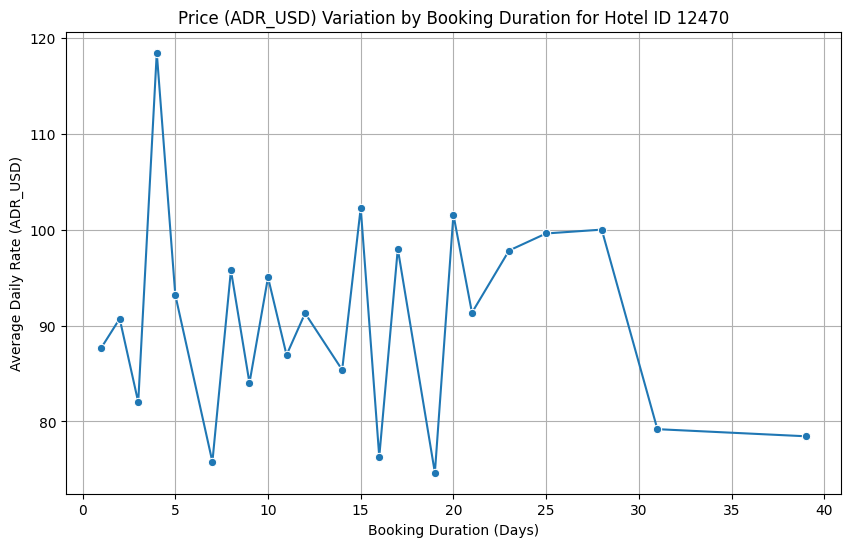

In [156]:

# Visualize how price varies with booking duration for a specific hotel (example: hotel_id = 12345)
hotel_id = 12470
hotel_data = grouped_df[grouped_df['hotel_id'] == hotel_id]

# Plot the price variation by booking duration for this hotel
plt.figure(figsize=(10, 6))
sns.lineplot(data=hotel_data, x='booking_duration', y='ADR_USD', marker='o')
plt.title(f'Price (ADR_USD) Variation by Booking Duration for Hotel ID {hotel_id}')
plt.xlabel('Booking Duration (Days)')
plt.ylabel('Average Daily Rate (ADR_USD)')
plt.grid(True)
plt.show()

In [158]:
# Group by hotel_id and booking_duration to calculate the average ADR (duration_adr)
duration_adr_df = combined_df.groupby(['hotel_id', 'booking_duration'])['ADR_USD'].mean().reset_index()

# Rename ADR_USD to duration_adr to reflect the new aggregated value
duration_adr_df = duration_adr_df.rename(columns={'ADR_USD': 'duration_adr'})

# Merge the duration_adr column back into the original combined_df DataFrame
combined_df = pd.merge(combined_df, duration_adr_df, on=['hotel_id', 'booking_duration'], how='left')

# Now combined_df contains both the original ADR_USD and the duration_adr
# Display the first few rows of the updated DataFrame
print(combined_df[['hotel_id', 'booking_duration', 'ADR_USD', 'duration_adr']].head())

   hotel_id  booking_duration  ADR_USD  duration_adr
0    297388                60    71.06     72.414286
1    298322                60    76.56     84.285000
2   2313076                60   153.88    218.506667
3   2240838                59   126.60    120.840000
4   2240838                59   115.08    120.840000


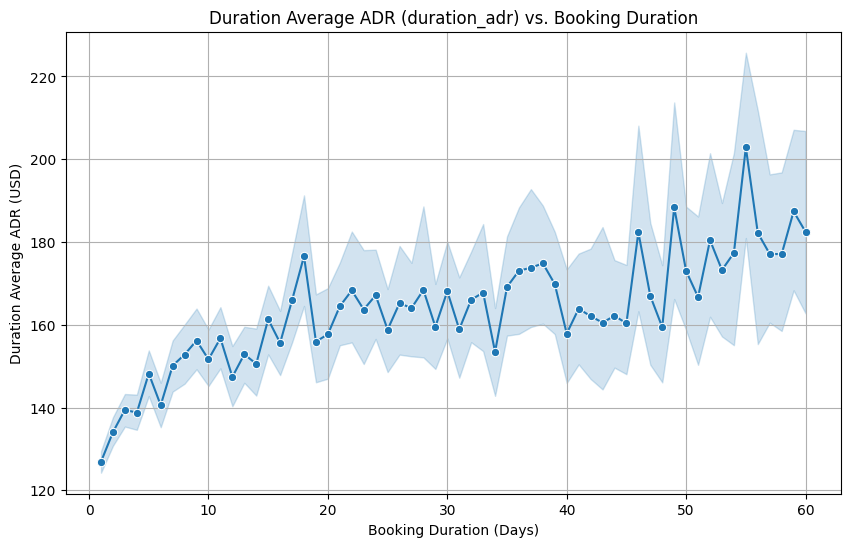

In [160]:
# Plotting the relationship between booking_duration and duration_adr
plt.figure(figsize=(10, 6))

# Lineplot for booking duration and average ADR (duration_adr)
sns.lineplot(x='booking_duration', y='duration_adr', data=combined_df, marker='o')

# Adding labels and title
plt.title('Duration Average ADR (duration_adr) vs. Booking Duration')
plt.xlabel('Booking Duration (Days)')
plt.ylabel('Duration Average ADR (USD)')
plt.grid(True)

# Display the plot
plt.show()